In [15]:
# Задание 1
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
path_data_2d = "data_2d.csv"
path_mnist = "mnist.csv"

In [4]:
data_2d = pd.read_csv(path_data_2d)
mnist = pd.read_csv(path_mnist)

In [5]:
K = range(1, 8)

In [6]:
def k_means(frame):
    distortions = []
    for k in K:
        k_meanModel = KMeans(n_clusters=k, n_init='auto')
        k_meanModel.fit(frame)
        distortions.append(k_meanModel.inertia_)

    return distortions

In [8]:
def show_k(distortions):
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

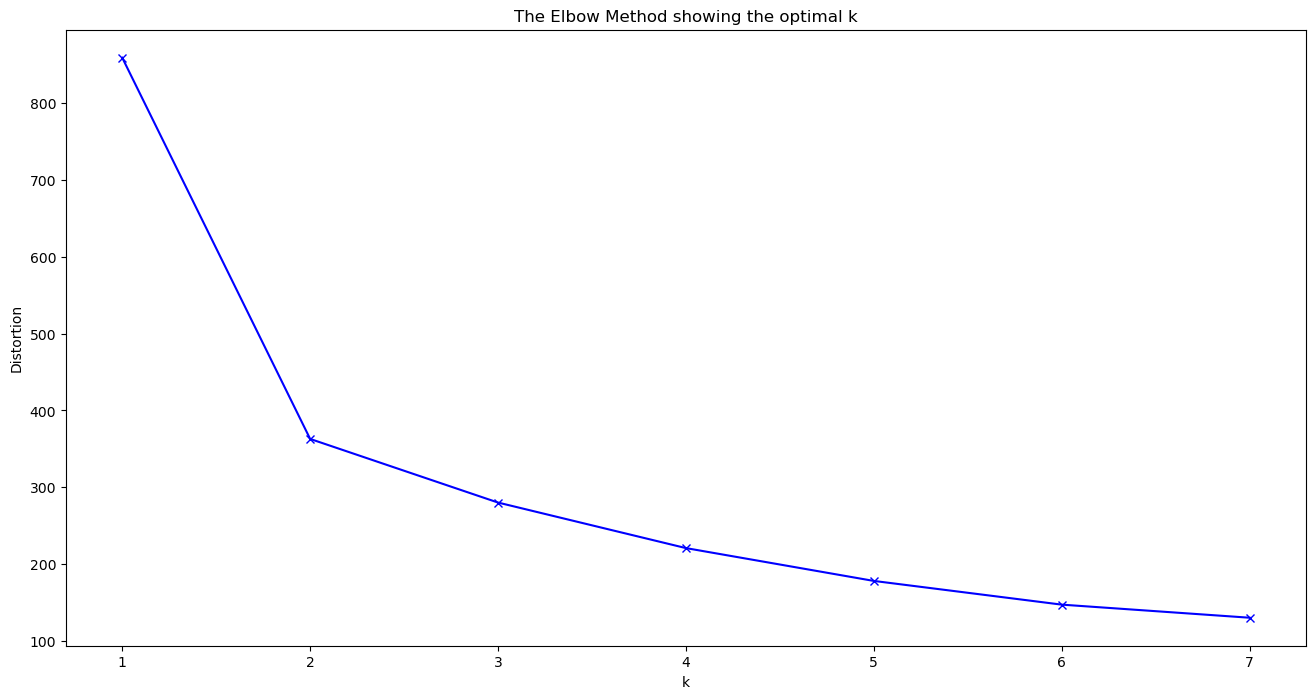

In [10]:
# Локтевой метод для data_2d
show_k(k_means(data_2d))

In [12]:
# Оптимальное количество кластеров - 2

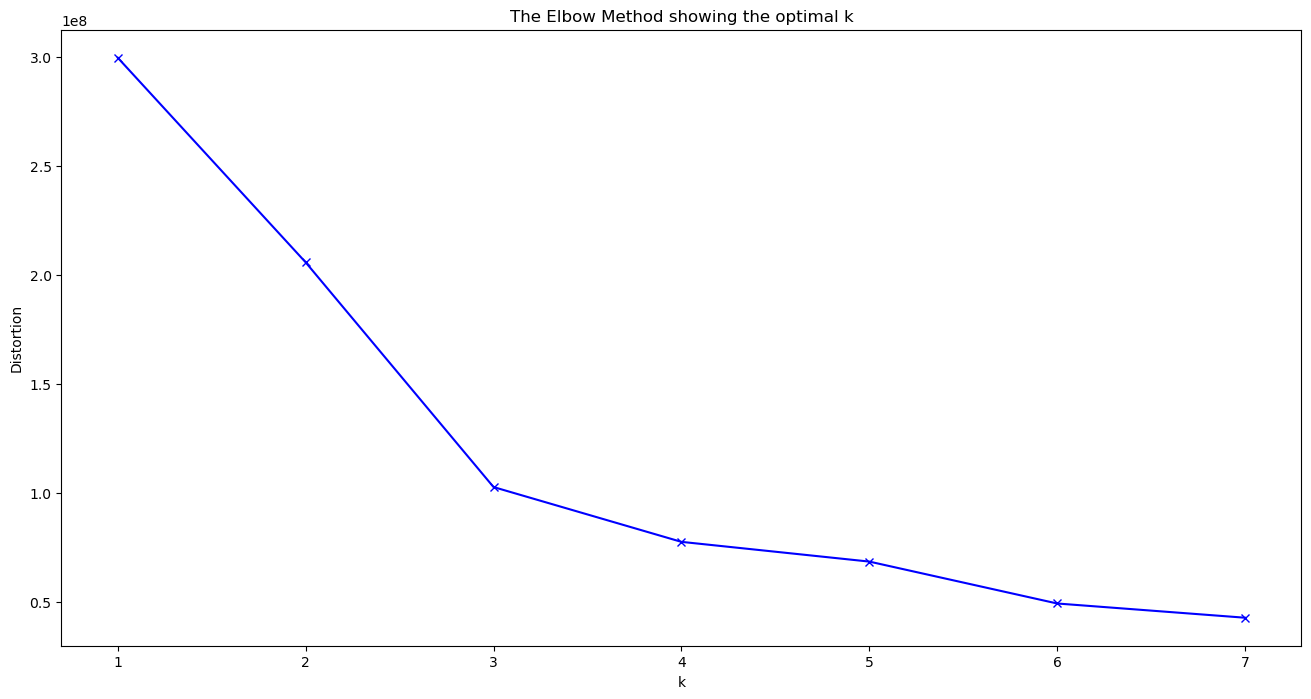

In [13]:
# Лоектевой метод для mnist
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist)
show_k(k_means(mnist_2d))

In [14]:
# Оптимальное количество кластеров для mnist_2d - 3

In [17]:
# Задание 2
def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)
    
    plt.figure(figsize=(16,8))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

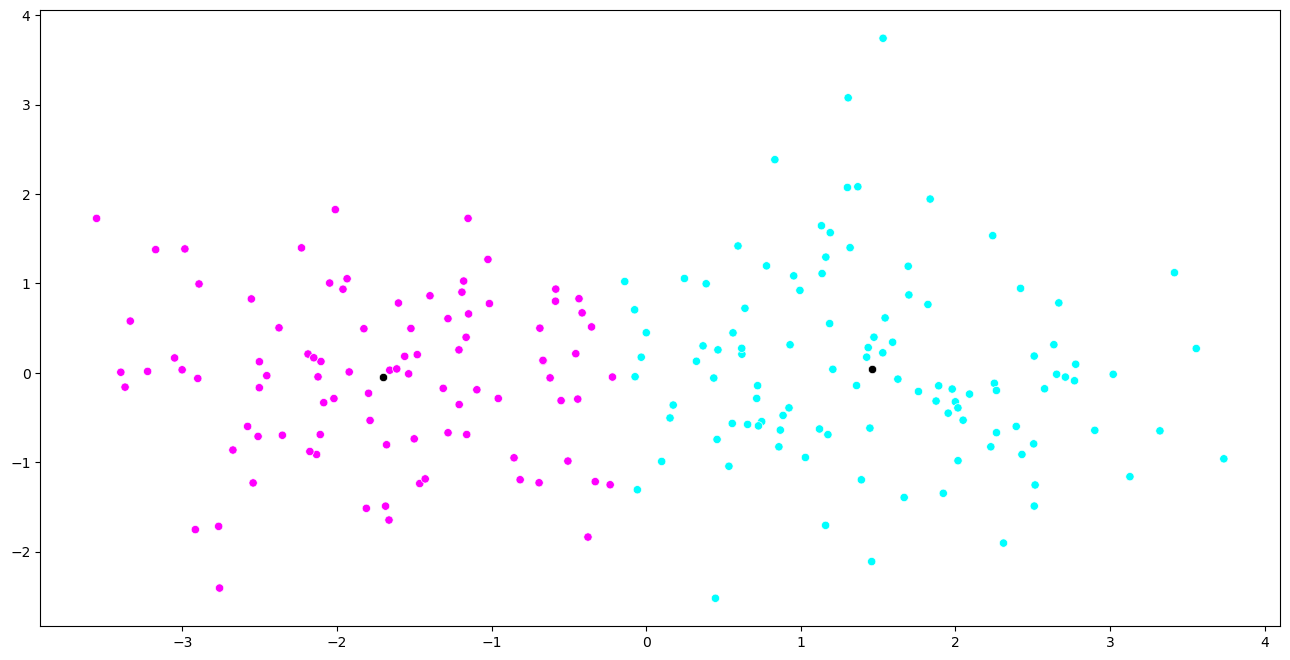

In [19]:
# Результат кластеризации data_2d
show_clustering(pca.fit_transform(data_2d), 2)

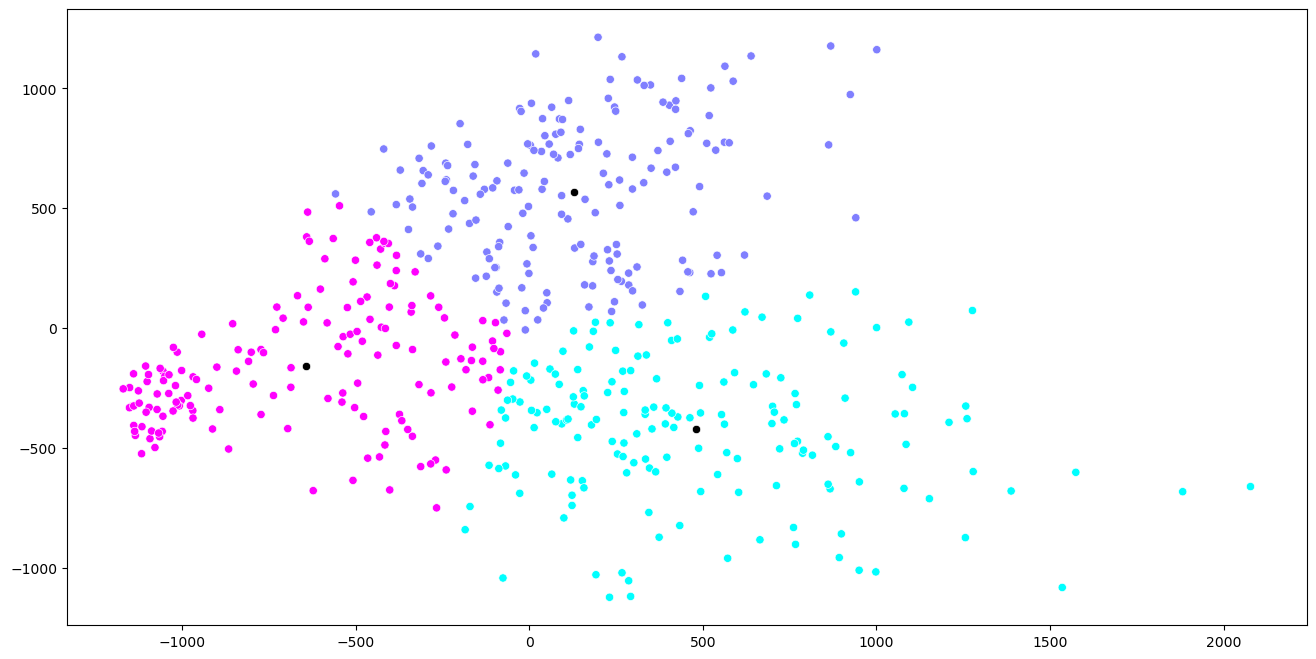

In [20]:
# Результат кластеризации mnist_2d
show_clustering(mnist_2d, 3)